In [2]:
import sys
import subprocess
import pkg_resources

def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

def check_list():
    piplist = []
    for p in pkg_resources.working_set:
        piplist.append(p.project_name)
    return piplist

libs = ['scikit-learn', 'seaborn', 'numpy', 'matplotlib',  'imbalanced-learn', 'xgboost', 'pyttsx3', 'pandas-profiling', 'sweetviz', 'keras-tuner']

for i in libs:
    piplist = check_list()
    try:
        if i not in piplist:
            install(i)
        else:
            next
    except:
        print(f'{i} failed to install')
        next


print('Package installations completed')

Package installations completed


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import  confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score as AUC
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
print('import success')

import success


In [4]:
df = pd.read_csv('/Users/wangzhuli/Desktop/Programing/pythonProject/venv/SBAnational.csv')

df_copy = df.copy()

/var/folders/jh/cytt78gs22j6112mw5_jsqn80000gn/T/ipykernel_46328/4218307646.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/wangzhuli/Desktop/Programing/pythonProject/venv/SBAnational.csv')


In [5]:
df_copy.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      899164 non-null  int64  
 1   Name               899150 non-null  object 
 2   City               899134 non-null  object 
 3   State              899150 non-null  object 
 4   Zip                899164 non-null  int64  
 5   Bank               897605 non-null  object 
 6   BankState          897598 non-null  object 
 7   NAICS              899164 non-null  int64  
 8   ApprovalDate       899164 non-null  object 
 9   ApprovalFY         899164 non-null  object 
 10  Term               899164 non-null  int64  
 11  NoEmp              899164 non-null  int64  
 12  NewExist           899028 non-null  float64
 13  CreateJob          899164 non-null  int64  
 14  RetainedJob        899164 non-null  int64  
 15  FranchiseCode      899164 non-null  int64  
 16  Ur

In [7]:
print(df_copy.head(0))

Empty DataFrame
Columns: [LoanNr_ChkDgt, Name, City, State, Zip, Bank, BankState, NAICS, ApprovalDate, ApprovalFY, Term, NoEmp, NewExist, CreateJob, RetainedJob, FranchiseCode, UrbanRural, RevLineCr, LowDoc, ChgOffDate, DisbursementDate, DisbursementGross, BalanceGross, MIS_Status, ChgOffPrinGr, GrAppv, SBA_Appv]
Index: []

[0 rows x 27 columns]


In [8]:
df_copy.shape

(899164, 27)

In [9]:
df_copy.isnull().sum()

LoanNr_ChkDgt             0
Name                     14
City                     30
State                    14
Zip                       0
Bank                   1559
BankState              1566
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                136
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4528
LowDoc                 2582
ChgOffDate           736465
DisbursementDate       2368
DisbursementGross         0
BalanceGross              0
MIS_Status             1997
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

In [10]:
df_copy.dropna(subset=['Name', 'City', 'State', 'BankState', 'NewExist','RevLineCr', 'LowDoc', 'DisbursementDate', 'MIS_Status'], inplace=True)
df_copy.isnull().sum()

LoanNr_ChkDgt             0
Name                      0
City                      0
State                     0
Zip                       0
Bank                      0
BankState                 0
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                  0
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr                 0
LowDoc                    0
ChgOffDate           725369
DisbursementDate          0
DisbursementGross         0
BalanceGross              0
MIS_Status                0
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

In [11]:
df_copy.dtypes

LoanNr_ChkDgt          int64
Name                  object
City                  object
State                 object
Zip                    int64
Bank                  object
BankState             object
NAICS                  int64
ApprovalDate          object
ApprovalFY            object
Term                   int64
NoEmp                  int64
NewExist             float64
CreateJob              int64
RetainedJob            int64
FranchiseCode          int64
UrbanRural             int64
RevLineCr             object
LowDoc                object
ChgOffDate            object
DisbursementDate      object
DisbursementGross     object
BalanceGross          object
MIS_Status            object
ChgOffPrinGr          object
GrAppv                object
SBA_Appv              object
dtype: object

In [12]:
df_copy[['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']].head()

,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv
0,"$60,000.00",$0.00,$0.00,"$60,000.00","$48,000.00"
1,"$40,000.00",$0.00,$0.00,"$40,000.00","$32,000.00"
2,"$287,000.00",$0.00,$0.00,"$287,000.00","$215,250.00"
3,"$35,000.00",$0.00,$0.00,"$35,000.00","$28,000.00"
4,"$229,000.00",$0.00,$0.00,"$229,000.00","$229,000.00"


In [13]:
def clean_dollar(x):
    return x.strip().replace('$', '').replace(',', '')
df_copy[['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']] = df_copy[['DisbursementGross', 'BalanceGross', 
                                                                                                'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']].applymap(clean_dollar)
df_copy[['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']].head()

,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv
0,60000.00,0.00,0.00,60000.00,48000.00
1,40000.00,0.00,0.00,40000.00,32000.00
2,287000.00,0.00,0.00,287000.00,215250.00
3,35000.00,0.00,0.00,35000.00,28000.00
4,229000.00,0.00,0.00,229000.00,229000.00


In [14]:
print(df_copy['ApprovalFY'].apply(type).value_counts())
print(df_copy['ApprovalFY'].unique())

<class 'int'>    759570
<class 'str'>    126670
Name: ApprovalFY, dtype: int64
[1997 1980 2006 1998 1999 2000 2001 1972 2003 2004 1978 1979 1981 2005
 1982 1983 1973 1984 2007 1985 1986 1987 2008 1988 2009 1989 1991 1990
 1974 2010 2011 1992 1993 2002 2012 2013 1994 2014 1975 1977 1976 '2004'
 '1994' '1979' '1976' '1975' '1974' '1977' '1981' '1982' '1983' '1984'
 '1978' '1980' '1968' '1976A' '1969' '1995' '1970' '2005' '1996' '1971'
 1996 1971]


In [15]:
def clear_ApprovalFY(x):
    if isinstance(x, str):
        x = int(x.replace('A', ''))
        return x
    return x
df_copy['ApprovalFY'] = df_copy['ApprovalFY'].apply(clear_ApprovalFY)
print(df_copy['ApprovalFY'].unique())

[1997 1980 2006 1998 1999 2000 2001 1972 2003 2004 1978 1979 1981 2005
 1982 1983 1973 1984 2007 1985 1986 1987 2008 1988 2009 1989 1991 1990
 1974 2010 2011 1992 1993 2002 2012 2013 1994 2014 1975 1977 1976 1968
 1969 1995 1970 1996 1971]


In [16]:
df_copy = df_copy.astype({'Zip': 'str', 'NewExist': 'int64', 'UrbanRural': 'str', 'DisbursementGross': 'float', 'BalanceGross': 'float', 'ChgOffPrinGr': 'float', 'GrAppv': 'float', 'SBA_Appv': 'float'})

df_copy.dtypes

LoanNr_ChkDgt          int64
Name                  object
City                  object
State                 object
Zip                   object
Bank                  object
BankState             object
NAICS                  int64
ApprovalDate          object
ApprovalFY             int64
Term                   int64
NoEmp                  int64
NewExist               int64
CreateJob              int64
RetainedJob            int64
FranchiseCode          int64
UrbanRural            object
RevLineCr             object
LowDoc                object
ChgOffDate            object
DisbursementDate      object
DisbursementGross    float64
BalanceGross         float64
MIS_Status            object
ChgOffPrinGr         float64
GrAppv               float64
SBA_Appv             float64
dtype: object

In [17]:
def naics_convert(x):
    digits = str(x)
    naics = digits[:2]
    return naics

df_copy['Industry'] = df_copy['NAICS'].apply(naics_convert)

NAICS_abre={'11': 'Ag/For/Fish/Hunt','21': 'Min/Quar/Oil_Gas_ext','22': 'Utilities','23': 'Construction',
            '31': 'Manufacturing','32': 'Manufacturing','33': 'Manufacturing','42': 'Wholesale_trade','44': 'Retail_trade','45': 'Retail_trade','48': 'Trans/Ware','49': 'Trans/Ware','51': 'Information','52': 'Finance/Insurance','53': 'RE/Rental/Lease','54': 'Prof/Science/Tech','55': 'Mgmt_comp','56': 'Admin_sup/Waste_Mgmt_Rem','61': 'Educational','62': 'Healthcare/Social_assist','71': 'Arts/Entertain/Rec','72': 'Accom/Food_serv','81': 'Other_no_pub','92': 'Public_Admin'}

df_copy['Industry'] = df_copy['Industry'].map(NAICS_abre)

df_copy.dropna(subset=['Industry'], inplace=True)

[0. 1.]
0.0    653340
1.0     34633
Name: IsFranchise, dtype: int64


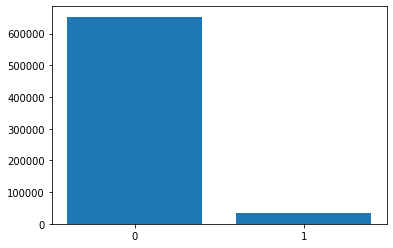

In [18]:
df_copy.loc[(df_copy['FranchiseCode'] <= 1), 'IsFranchise'] = 0
df_copy.loc[(df_copy['FranchiseCode'] > 1), 'IsFranchise'] = 1
print(df_copy['IsFranchise'].unique())
print(df_copy['IsFranchise'].value_counts())
plt.bar(['0','1'],df_copy['IsFranchise'].value_counts())
plt.show()

In [19]:
print(df_copy['NewExist'].unique())

[2 1 0]


[2 1]
0.0    496618
1.0    190628
Name: NewBusiness, dtype: int64


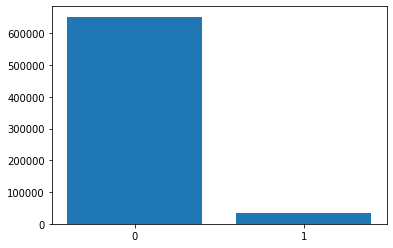

In [20]:
df_copy = df_copy[(df_copy['NewExist'] == 1) | (df_copy['NewExist'] == 2)]

df_copy.loc[(df_copy['NewExist'] == 1), 'NewBusiness'] = 0
df_copy.loc[(df_copy['NewExist'] == 2), 'NewBusiness'] = 1

print(df_copy['NewExist'].unique())
print(df_copy['NewBusiness'].value_counts())
plt.bar(['0','1'],df_copy['IsFranchise'].value_counts())
plt.show()

In [21]:
print(df_copy['RevLineCr'].unique())

['N' 'Y' '0' 'T' '`' ',' '1' 'C' '2' 'R' '7' 'A' '-' 'Q']


In [22]:
df_copy = df_copy[(df_copy['RevLineCr'] == 'Y') | (df_copy['RevLineCr'] == 'N')]
df_copy['RevLineCr'] = np.where(df_copy['RevLineCr'] == 'N', 0, 1)
print(df_copy['RevLineCr'].unique())

[0 1]


In [23]:
print(df_copy['LowDoc'].unique())

['Y' 'N' 'C' '1' 'S' 'R' 'A' '0']


In [24]:
df_copy = df_copy[(df_copy['LowDoc'] == 'Y') | (df_copy['LowDoc'] == 'N')]
df_copy['LowDoc'] = np.where(df_copy['LowDoc'] == 'N', 0, 1)
print(df_copy['LowDoc'].unique())

[1 0]


0    358558
1     98382
Name: Default, dtype: int64


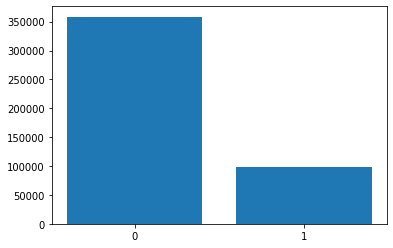

In [25]:
df_copy['Default'] = np.where(df_copy['MIS_Status'] == 'P I F', 0, 1)
print(df_copy['Default'].value_counts())

plt.bar(['0','1'],df_copy['Default'].value_counts())
plt.show()

In [26]:
df_copy[['ApprovalDate', 'DisbursementDate']] = df_copy[['ApprovalDate', 'DisbursementDate']].apply(pd.to_datetime)

In [27]:
df_copy['DaysToDisbursement'] = df_copy['DisbursementDate'] - df_copy['ApprovalDate']

def dtd_format(x):
    str_dtd = str(x)
    int_dtd = int(str_dtd[:str_dtd.index('d')-1])
    return int_dtd
df_copy['DaysToDisbursement'] = df_copy['DaysToDisbursement'].apply(dtd_format)

def df_format(x):
    return x.year
df_copy['DisbursementFY'] = df_copy['DisbursementDate'].map(df_format)

print(df_copy['DaysToDisbursement'])
print(df_copy['DisbursementFY'])

0         730
1          92
2         306
5         122
7         487
         ... 
899145     32
899146    167
899157     32
899160    246
899161    215
Name: DaysToDisbursement, Length: 456940, dtype: int64
0         1999
1         1997
2         1997
5         1997
7         1998
          ... 
899145    1997
899146    1997
899157    1997
899160    1997
899161    1997
Name: DisbursementFY, Length: 456940, dtype: int64


In [28]:
df_copy['StateSame'] = np.where(df_copy['State'] == df_copy['BankState'], 1, 0)

print(df_copy['StateSame'])

0         0
1         1
2         1
5         0
7         0
         ..
899145    0
899146    1
899157    1
899160    0
899161    1
Name: StateSame, Length: 456940, dtype: int64


In [29]:
df_copy['SBA_AppvPct'] = df_copy['SBA_Appv'] / df_copy['GrAppv']
print(df_copy['SBA_AppvPct'])

0         0.80
1         0.80
2         0.75
5         0.75
7         0.80
          ... 
899145    0.50
899146    1.00
899157    0.75
899160    0.50
899161    0.75
Name: SBA_AppvPct, Length: 456940, dtype: float64


In [30]:
df_copy['AppvDisbursed'] = np.where(df_copy['DisbursementGross'] == df_copy['GrAppv'], 1, 0)
print(df_copy['AppvDisbursed'])
df_copy['AppvDisbursed'].value_counts()

0         1
1         1
2         1
5         1
7         1
         ..
899145    1
899146    1
899157    1
899160    1
899161    1
Name: AppvDisbursed, Length: 456940, dtype: int64


1    290883
0    166057
Name: AppvDisbursed, dtype: int64

In [31]:
df_copy.dtypes

LoanNr_ChkDgt                  int64
Name                          object
City                          object
State                         object
Zip                           object
Bank                          object
BankState                     object
NAICS                          int64
ApprovalDate          datetime64[ns]
ApprovalFY                     int64
Term                           int64
NoEmp                          int64
NewExist                       int64
CreateJob                      int64
RetainedJob                    int64
FranchiseCode                  int64
UrbanRural                    object
RevLineCr                      int64
LowDoc                         int64
ChgOffDate                    object
DisbursementDate      datetime64[ns]
DisbursementGross            float64
BalanceGross                 float64
MIS_Status                    object
ChgOffPrinGr                 float64
GrAppv                       float64
SBA_Appv                     float64
I

In [32]:
df_copy = df_copy.astype({'IsFranchise': 'int64', 'NewBusiness': 'int64'})
df_copy.dtypes

LoanNr_ChkDgt                  int64
Name                          object
City                          object
State                         object
Zip                           object
Bank                          object
BankState                     object
NAICS                          int64
ApprovalDate          datetime64[ns]
ApprovalFY                     int64
Term                           int64
NoEmp                          int64
NewExist                       int64
CreateJob                      int64
RetainedJob                    int64
FranchiseCode                  int64
UrbanRural                    object
RevLineCr                      int64
LowDoc                         int64
ChgOffDate                    object
DisbursementDate      datetime64[ns]
DisbursementGross            float64
BalanceGross                 float64
MIS_Status                    object
ChgOffPrinGr                 float64
GrAppv                       float64
SBA_Appv                     float64
I

In [33]:
df_copy.drop(columns=['LoanNr_ChkDgt', 'Name', 'City', 'Zip', 'Bank', 'NAICS', 'ApprovalDate', 'NewExist', 'FranchiseCode','ChgOffDate', 'DisbursementDate',
                      'BalanceGross', 'ChgOffPrinGr', 'SBA_Appv', 'MIS_Status'], inplace=True)

In [34]:
print(df_copy.isnull().sum())
df_copy.shape

State                 0
BankState             0
ApprovalFY            0
Term                  0
NoEmp                 0
CreateJob             0
RetainedJob           0
UrbanRural            0
RevLineCr             0
LowDoc                0
DisbursementGross     0
GrAppv                0
Industry              0
IsFranchise           0
NewBusiness           0
Default               0
DaysToDisbursement    0
DisbursementFY        0
StateSame             0
SBA_AppvPct           0
AppvDisbursed         0
dtype: int64


(456940, 21)

In [35]:
df_copy.head()

,State,BankState,ApprovalFY,Term,NoEmp,CreateJob,RetainedJob,UrbanRural,RevLineCr,LowDoc,...,GrAppv,Industry,IsFranchise,NewBusiness,Default,DaysToDisbursement,DisbursementFY,StateSame,SBA_AppvPct,AppvDisbursed
0,IN,OH,1997,84,4,0,0,0,0,1,...,60000.0,Retail_trade,0,1,0,730,1999,0,0.80,1
1,IN,IN,1997,60,2,0,0,0,0,1,...,40000.0,Accom/Food_serv,0,1,0,92,1997,1,0.80,1
2,IN,IN,1997,180,7,0,0,0,0,0,...,287000.0,Healthcare/Social_assist,0,0,0,306,1997,1,0.75,1
5,CT,DE,1997,120,19,0,0,0,0,0,...,517000.0,Manufacturing,0,0,0,122,1997,0,0.75,1
7,FL,AL,1997,84,1,0,0,0,0,1,...,45000.0,Other_no_pub,0,1,0,487,1998,0,0.80,1


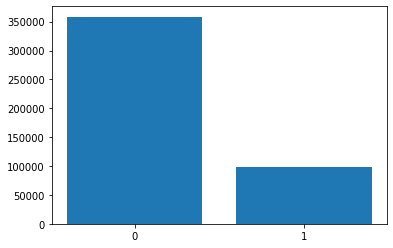

In [36]:
df_copy['Default'].value_counts()
plt.bar(['0','1'],df_copy['Default'].value_counts())
plt.show()

In [37]:
df_copy.describe()

,State,BankState,ApprovalFY,Term,NoEmp,CreateJob,RetainedJob,UrbanRural,RevLineCr,LowDoc,...,GrAppv,Industry,IsFranchise,NewBusiness,Default,DaysToDisbursement,DisbursementFY,StateSame,SBA_AppvPct,AppvDisbursed
count,456940,456940,456940.000000,456940.000000,456940.000000,456940.000000,456940.000000,456940,456940.000000,456940.000000,...,4.569400e+05,456940,456940.000000,456940.000000,456940.000000,456940.000000,456940.000000,456940.000000,456940.000000,456940.000000
unique,51,54,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,CA,NC,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,...,NaN,Retail_trade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,61387,56407,NaN,NaN,NaN,NaN,NaN,285558,NaN,NaN,...,NaN,80952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2003.020642,93.811706,9.895455,1.896610,4.782175,NaN,0.420053,0.054937,...,1.542110e+05,NaN,0.031214,0.265061,0.215306,108.578463,2003.063249,0.456872,0.652474,0.636589
std,NaN,NaN,5.657087,68.362394,56.807480,16.277406,15.697409,NaN,0.493568,0.227858,...,2.613271e+05,NaN,0.173896,0.441366,0.411035,190.739346,5.575671,0.498137,0.179334,0.480982
min,NaN,NaN,1984.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,...,1.000000e+03,NaN,0.000000,0.000000,0.000000,-3614.000000,1984.000000,0.000000,0.050000,0.000000
25%,NaN,NaN,2000.000000,59.000000,2.000000,0.000000,0.000000,NaN,0.000000,0.000000,...,2.500000e+04,NaN,0.000000,0.000000,0.000000,26.000000,2000.000000,0.000000,0.500000,0.000000
50%,NaN,NaN,2005.000000,84.000000,4.000000,0.000000,1.000000,NaN,0.000000,0.000000,...,5.000000e+04,NaN,0.000000,0.000000,0.000000,49.000000,2005.000000,0.000000,0.500000,1.000000
75%,NaN,NaN,2007.000000,90.000000,9.000000,1.000000,5.000000,NaN,1.000000,0.000000,...,1.570000e+05,NaN,0.000000,1.000000,0.000000,108.000000,2007.000000,1.000000,0.819209,1.000000


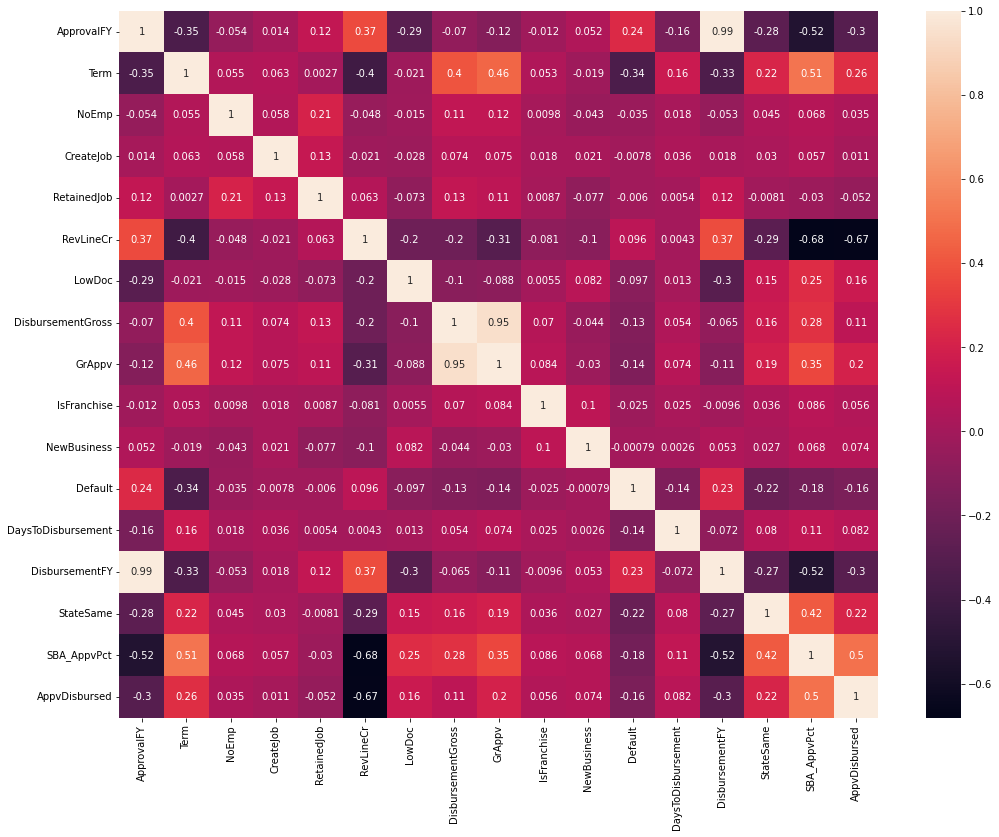

In [38]:
corr_f, corr_x = plt.subplots(figsize=(17, 13))
corr_mx = df_copy.corr()
corr_x_ax = sns.heatmap(corr_mx, annot=True)
plt.xticks()
plt.yticks()

plt.show()

In [39]:
df_copy.to_csv('/Users/wangzhuli/Desktop/Programing/pythonProject/venv/SBAnational_preprocessed.csv')

In [40]:
df_copy = pd.get_dummies(df_copy)

df_copy.head()

,ApprovalFY,Term,NoEmp,CreateJob,RetainedJob,RevLineCr,LowDoc,DisbursementGross,GrAppv,IsFranchise,...,Industry_Mgmt_comp,Industry_Min/Quar/Oil_Gas_ext,Industry_Other_no_pub,Industry_Prof/Science/Tech,Industry_Public_Admin,Industry_RE/Rental/Lease,Industry_Retail_trade,Industry_Trans/Ware,Industry_Utilities,Industry_Wholesale_trade
0,1997,84,4,0,0,0,1,60000.0,60000.0,0,...,0,0,0,0,0,0,1,0,0,0
1,1997,60,2,0,0,0,1,40000.0,40000.0,0,...,0,0,0,0,0,0,0,0,0,0
2,1997,180,7,0,0,0,0,287000.0,287000.0,0,...,0,0,0,0,0,0,0,0,0,0
5,1997,120,19,0,0,0,0,517000.0,517000.0,0,...,0,0,0,0,0,0,0,0,0,0
7,1997,84,1,0,0,0,1,45000.0,45000.0,0,...,0,0,1,0,0,0,0,0,0,0


In [41]:
y = df_copy['Default']
X = df_copy.drop('Default', axis=1)

In [42]:
# Scale the feature values prior to modeling
scale = StandardScaler()
X_scaled = scale.fit_transform(X)
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.25)

LogisticRegression

              precision    recall  f1-score   support

           0      0.887     0.954     0.919     89672
           1      0.770     0.556     0.645     24563

    accuracy                          0.869    114235
   macro avg      0.828     0.755     0.782    114235
weighted avg      0.862     0.869     0.861    114235



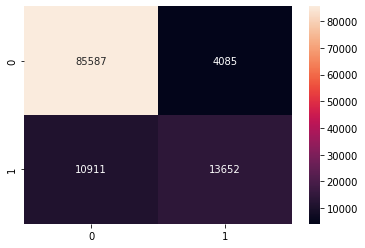

In [194]:
# Initialize model
log_reg = LogisticRegression()

# Train the model and make predictions
log_reg.fit(X_train, y_train)
y_logpred = log_reg.predict(X_val)

# Print the results
print(classification_report(y_val, y_logpred, digits=3))
cm_log = confusion_matrix(y_val, y_logpred)
f_log = sns.heatmap(cm_log, annot=True, fmt='d')

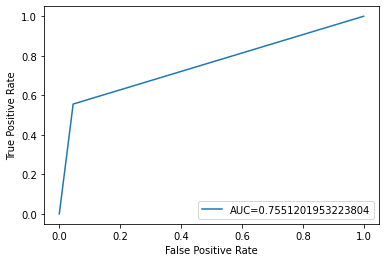

In [195]:
fpr, tpr, _ = metrics.roc_curve(y_val,  y_logpred)
auc = metrics.roc_auc_score(y_val, y_logpred)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

LR Tuning

In [167]:
parameters_lr = {'C':np.logspace(0,4,10), 'penalty':['l1','l2','none']}

clf_lr = GridSearchCV(estimator= log_reg, param_grid= parameters_lr,
                      scoring= 'accuracy', n_jobs= -1, cv= 5)
clf_lr.fit(X_train, y_train)

print('Detail\n', pd.DataFrame.from_records(clf_lr.cv_results_))
print('Best estimator\n', clf_lr.best_estimator_)
print('Best score\n', clf_lr.best_score_)
print('Best parameters\n', clf_lr.best_params_)

/Users/wangzhuli/Desktop/Programing/pythonProject/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/wangzhuli/Desktop/Programing/pythonProject/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/wangzhuli/Desktop/Programing/pythonProject/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/wangzhuli/Desktop/Programing/pythonProject/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/wangzhuli/Desktop/Programing/pythonProject/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: 

Detail
     mean_fit_time  mean_score_time  mean_test_score      param_C  \
0        1.675125         0.000000              NaN          1.0   
1        4.042634         0.028232         0.868423          1.0   
2        2.870529         0.032610         0.868417          1.0   
3        0.113648         0.000000              NaN     2.782559   
4        3.307579         0.135882         0.868417     2.782559   
5        3.655810         0.068214         0.868417     2.782559   
6        0.224644         0.000000              NaN     7.742637   
7        3.667542         0.030254         0.868420     7.742637   
8        2.902874         0.021145         0.868417     7.742637   
9        0.132943         0.000000              NaN    21.544347   
10       2.941348         0.013892         0.868417    21.544347   
11       2.863872         0.011876         0.868417    21.544347   
12       0.124376         0.000000              NaN    59.948425   
13       2.915168         0.012814      

XGbooster

              precision    recall  f1-score   support

           0      0.969     0.976     0.972     89647
           1      0.909     0.888     0.898     24588

    accuracy                          0.957    114235
   macro avg      0.939     0.932     0.935    114235
weighted avg      0.956     0.957     0.956    114235



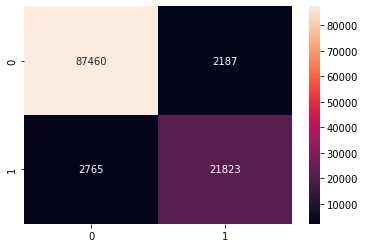

In [42]:
xgboost = XGBClassifier()

xgboost.fit(X_train, y_train)
y_xgbpred = xgboost.predict(X_val)

print(classification_report(y_val, y_xgbpred, digits=3))
cm_xgb = confusion_matrix(y_val, y_xgbpred)
f_xgb = sns.heatmap(cm_xgb, annot=True, fmt='d')

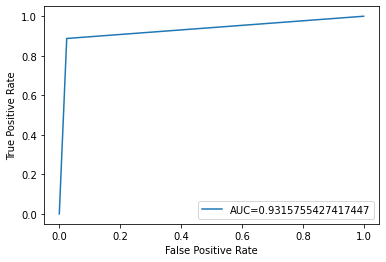

In [43]:
fpr, tpr, _ = metrics.roc_curve(y_val,  y_xgbpred)
auc = metrics.roc_auc_score(y_val, y_xgbpred)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

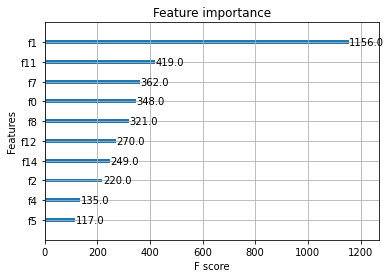

In [52]:
plot_importance(xgboost, max_num_features=10) # top 10 most important features
plt.show()

In [79]:
pd.DataFrame({'col_name': xgboost.feature_importances_}, index=X.columns).sort_values(by='col_name', ascending=False)

,col_name
Term,0.089368
StateSame,0.062109
BankState_CA,0.047844
BankState_NC,0.041437
ApprovalFY,0.037701
...,...
State_KS,0.000000
State_IN,0.000000
State_DE,0.000000
BankState_WV,0.000000


XGB Tuning

In [171]:
parameters_xgb = {'eta':['0.2','0.3','0.4'], 'gamma':['0','1','2'], 'max_depth':['5','6','7']}

clf_xgb = GridSearchCV(estimator= xgboost, param_grid= parameters_xgb,
                      scoring= 'accuracy', n_jobs= -1, cv= 5)
clf_xgb.fit(X_train, y_train)

#result
print('Detail\n', pd.DataFrame.from_records(clf_xgb.cv_results_))
print('Best estimator\n', clf_xgb.best_estimator_)
print('Best score\n', clf_xgb.best_score_)
print('Best parameters\n', clf_xgb.best_params_)

Detail
     mean_fit_time  mean_score_time  mean_test_score param_eta param_gamma  \
0      156.427409         0.173510         0.954769       0.2           0   
1      173.513489         0.216074         0.956566       0.2           0   
2      190.348736         0.247516         0.957806       0.2           0   
3      132.616128         0.184613         0.954582       0.2           1   
4      162.891266         0.222255         0.956677       0.2           1   
5      197.680478         0.249595         0.957771       0.2           1   
6      150.949542         0.192368         0.954783       0.2           2   
7      178.792837         0.215535         0.956575       0.2           2   
8      199.615230         0.257043         0.957736       0.2           2   
9      145.507488         0.188755         0.954769       0.3           0   
10     175.621864         0.213691         0.956566       0.3           0   
11     201.630065         0.249868         0.957806       0.3       

Support Vector Machines-2h30min

              precision    recall  f1-score   support

           0      0.914     0.967     0.940     89833
           1      0.845     0.666     0.745     24402

    accuracy                          0.903    114235
   macro avg      0.880     0.816     0.842    114235
weighted avg      0.899     0.903     0.898    114235



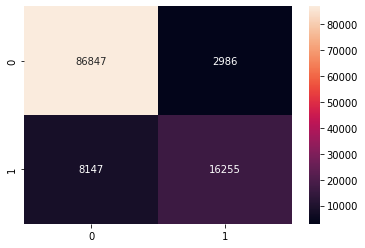

In [172]:
svm_rbf = svm.SVC(kernel='rbf') # Rbf Kernel

svm_rbf.fit(X_train, y_train)
y_rsvmpred = svm_rbf.predict(X_val)

print(classification_report(y_val, y_rsvmpred, digits=3))
cm_svm = confusion_matrix(y_val, y_rsvmpred)
f_svm = sns.heatmap(cm_svm, annot=True, fmt='d')

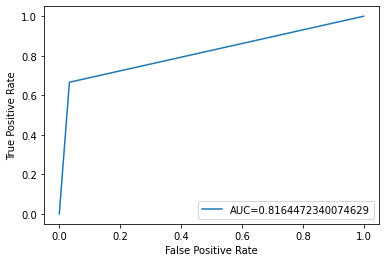

In [173]:
fpr, tpr, _ = metrics.roc_curve(y_val,  y_rsvmpred)
auc = metrics.roc_auc_score(y_val, y_rsvmpred)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

SVM Tuning

In [ ]:
parameters_svm = {'C':[0.1, 1, 10], 'gamma':[1, 0.1, 0.01,'scale']}

clf_svm = GridSearchCV(estimator= svm_rbf, param_grid= parameters_svm,
                      scoring= 'accuracy', n_jobs= -1, cv= 5)
clf_svm.fit(X_train, y_train)

print('Detail\n', pd.DataFrame.from_records(clf_svm.cv_results_))
print('Best estimator\n', clf_svm.best_estimator_)
print('Best score\n', clf_svm.best_score_)
print('Best parameters\n', clf_svm.best_params_)

Random forest -20min


              precision    recall  f1-score   support

           0       0.95      0.98      0.97     89507
           1       0.92      0.82      0.87     24728

    accuracy                           0.95    114235
   macro avg       0.94      0.90      0.92    114235
weighted avg       0.95      0.95      0.94    114235



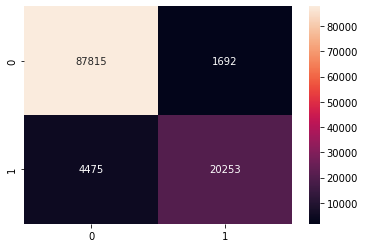

In [43]:
Ran_forest = RandomForestClassifier()

Ran_forest.fit(X_train, y_train)
y_ranpred = Ran_forest.predict(X_val)

print(classification_report(y_val,y_ranpred))
cm_ran = confusion_matrix(y_val, y_ranpred)
f_ran = sns.heatmap(cm_ran, annot=True, fmt='d')

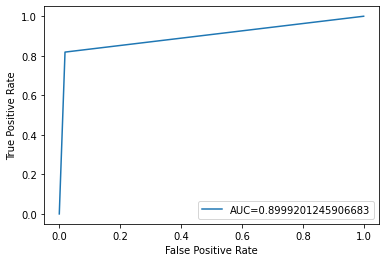

In [332]:
fpr, tpr, _ = metrics.roc_curve(y_val,  y_ranpred)
auc = metrics.roc_auc_score(y_val, y_ranpred)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

RF Tuning

In [44]:
parameters_rf = {'n_estimators':range(10,100,10), 'max_depth':range(3,14,2),
                     'min_samples_split':range(0,20)}

clf_rf = GridSearchCV(estimator= Ran_forest, param_grid= parameters_rf,
                      scoring= 'accuracy', n_jobs= -1, cv= 5)
clf_rf.fit(X_train, y_train)

print('Detail\n', pd.DataFrame.from_records(clf_rf.cv_results_))
print('Best estimator\n', clf_rf.best_estimator_)
print('Best score\n', clf_rf.best_score_)
print('Best parameters\n', clf_rf.best_params_)

/Users/wangzhuli/Desktop/Programing/pythonProject/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
540 fits failed out of a total of 5400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
270 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/wangzhuli/Desktop/Programing/pythonProject/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/wangzhuli/Desktop/Programing/pythonProject/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py", line 476, in fit
    trees = Parallel(
  File "/Users/wangzhuli/Desktop/Programing/pythonProject/venv/

Detail
       mean_fit_time  mean_score_time  mean_test_score param_max_depth  \
0          1.968810         0.000000              NaN               3   
1          1.253772         0.000000              NaN               3   
2          0.154848         0.000000              NaN               3   
3          0.167739         0.000000              NaN               3   
4          0.163149         0.000000              NaN               3   
...             ...              ...              ...             ...   
1075      17.126450         0.362119         0.917209              13   
1076      20.121438         0.418239         0.918160              13   
1077      23.576269         0.501968         0.918875              13   
1078      26.537975         0.531392         0.918536              13   
1079      24.800220         0.487987         0.918282              13   

     param_min_samples_split param_n_estimators  \
0                          0                 10   
1            

imbalance dataset control - random undersampling

In [45]:
df_imbalance = df_copy.copy()
df_imbalance.head()

,ApprovalFY,Term,NoEmp,CreateJob,RetainedJob,RevLineCr,LowDoc,DisbursementGross,GrAppv,IsFranchise,...,Industry_Mgmt_comp,Industry_Min/Quar/Oil_Gas_ext,Industry_Other_no_pub,Industry_Prof/Science/Tech,Industry_Public_Admin,Industry_RE/Rental/Lease,Industry_Retail_trade,Industry_Trans/Ware,Industry_Utilities,Industry_Wholesale_trade
0,1997,84,4,0,0,0,1,60000.0,60000.0,0,...,0,0,0,0,0,0,1,0,0,0
1,1997,60,2,0,0,0,1,40000.0,40000.0,0,...,0,0,0,0,0,0,0,0,0,0
2,1997,180,7,0,0,0,0,287000.0,287000.0,0,...,0,0,0,0,0,0,0,0,0,0
5,1997,120,19,0,0,0,0,517000.0,517000.0,0,...,0,0,0,0,0,0,0,0,0,0
7,1997,84,1,0,0,0,1,45000.0,45000.0,0,...,0,0,1,0,0,0,0,0,0,0


In [106]:
y = df_imbalance['Default']
X = df_imbalance.drop('Default', axis=1)

rus = RandomUnderSampler(sampling_strategy='majority')
X_resampled, y_resampled = rus.fit_resample(X, y)
print(sorted(Counter(y).items()))
print(sorted(Counter(y_resampled).items()))

scale = StandardScaler()
X_scaled = scale.fit_transform(X_resampled)

X_train_rus, X_val_rus, y_train_rus, y_val_rus = train_test_split(X_scaled, y_resampled, test_size=0.25)

[(0, 358558), (1, 98382)]
[(0, 98382), (1, 98382)]


LogisticRegression - random undersampling

              precision    recall  f1-score   support

           0      0.839     0.788     0.813     24633
           1      0.799     0.849     0.823     24558

    accuracy                          0.818     49191
   macro avg      0.819     0.818     0.818     49191
weighted avg      0.819     0.818     0.818     49191



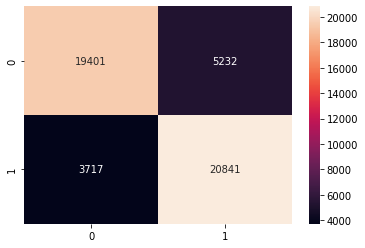

In [321]:
log_reg_rus = LogisticRegression()

log_reg_rus.fit(X_train_rus, y_train_rus)
y_logpred_rus = log_reg_rus.predict(X_val_rus)

print(classification_report(y_val_rus, y_logpred_rus, digits=3))
cm_log_rus = confusion_matrix(y_val_rus, y_logpred_rus)
f_log_rus = sns.heatmap(cm_log_rus, annot=True, fmt='d')

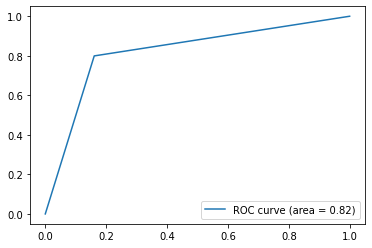

In [322]:
fpr, tpr, _ = metrics.roc_curve(y_val_rus,  y_logpred_rus)
auc = metrics.roc_auc_score(y_val_rus, y_logpred_rus)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

LR tuning - rus

In [265]:
parameters_lr_rus = {'C':np.logspace(0,4,10), 'penalty':['l1','l2','none']}

clf_lr_rus = GridSearchCV(estimator= log_reg_rus, param_grid= parameters_lr_rus,
                      scoring= 'accuracy', n_jobs= -1, cv= 5)
clf_lr_rus.fit(X_train_rus, y_train_rus)

print('Detail\n', pd.DataFrame.from_records(clf_lr_rus.cv_results_))
print('Best estimator\n', clf_lr_rus.best_estimator_)
print('Best score\n', clf_lr_rus.best_score_)
print('Best parameters\n', clf_lr_rus.best_params_)

/Users/wangzhuli/Desktop/Programing/pythonProject/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/wangzhuli/Desktop/Programing/pythonProject/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/wangzhuli/Desktop/Programing/pythonProject/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/wangzhuli/Desktop/Programing/pythonProject/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/wangzhuli/Desktop/Programing/pythonProject/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: 

Detail
     mean_fit_time  mean_score_time  mean_test_score      param_C  \
0        2.286443         0.029082         0.815224          1.0   
1        1.663469         0.012203         0.815197          1.0   
2        1.299627         0.045255         0.815197     2.782559   
3        1.213371         0.013142         0.815197     2.782559   
4        1.270169         0.019086         0.815190     7.742637   
5        1.415190         0.023406         0.815197     7.742637   
6        1.219306         0.019838         0.815190    21.544347   
7        1.550206         0.064024         0.815197    21.544347   
8        1.691071         0.059618         0.815190    59.948425   
9        1.955678         0.039789         0.815197    59.948425   
10       1.544956         0.037096         0.815197   166.810054   
11       1.651619         0.033745         0.815197   166.810054   
12       1.638116         0.013012         0.815197   464.158883   
13       1.326200         0.008688      

XGboost - random undersampling

              precision    recall  f1-score   support

           0      0.949     0.940     0.945     24633
           1      0.940     0.950     0.945     24558

    accuracy                          0.945     49191
   macro avg      0.945     0.945     0.945     49191
weighted avg      0.945     0.945     0.945     49191



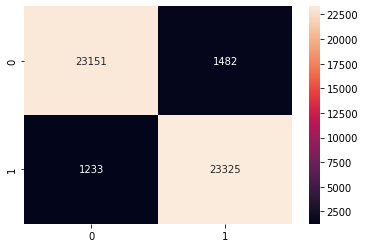

In [323]:
xgboost_rus = XGBClassifier()

xgboost_rus.fit(X_train_rus, y_train_rus)
y_xgbpred_rus = xgboost_rus.predict(X_val_rus)

print(classification_report(y_val_rus, y_xgbpred_rus, digits=3))
cm_xgb_rus = confusion_matrix(y_val_rus, y_xgbpred_rus)
f_xgb_rus = sns.heatmap(cm_xgb_rus, annot=True, fmt='d')

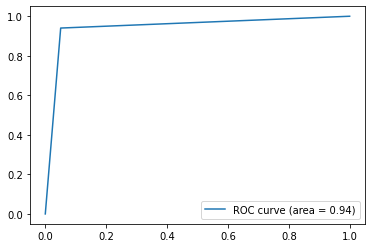

In [324]:
fpr, tpr, _ = metrics.roc_curve(y_val_rus,  y_xgbpred_rus)
auc = metrics.roc_auc_score(y_val_rus, y_xgbpred_rus)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

XGB tuning - rus

In [ ]:
parameters_xgb_rus = {'eta':['0.2','0.3','0.4'], 'gamma':['0','1','2'], 'max_depth':['5','6','7']}

clf_xgb_rus = GridSearchCV(estimator= xgboost_rus, param_grid= parameters_xgb_rus,
                      scoring= 'accuracy', n_jobs= -1, cv= 5)
clf_xgb_rus.fit(X_train_rus, y_train_rus)

print('Detail\n', pd.DataFrame.from_records(clf_xgb_rus.cv_results_))
print('Best estimator\n', clf_xgb_rus.best_estimator_)
print('Best score\n', clf_xgb_rus.best_score_)
print('Best parameters\n', clf_xgb_rus.best_params_)

random forest - random undersampling

              precision    recall  f1-score   support

           0       0.91      0.94      0.93     24633
           1       0.94      0.91      0.92     24558

    accuracy                           0.93     49191
   macro avg       0.93      0.93      0.93     49191
weighted avg       0.93      0.93      0.93     49191



"\n# Print the results\ndf_ran_predict = pd.DataFrame({'Actual':y_val, 'Predicted':y_ranpred})\nprint(df_ran_predict)\nprint('Mean Absolute Error:', metrics.mean_absolute_error(y_val, y_ranpred))\nprint('Mean Squared Error:', metrics.mean_squared_error(y_val, y_ranpred))\nprint('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val, y_ranpred)))\n"

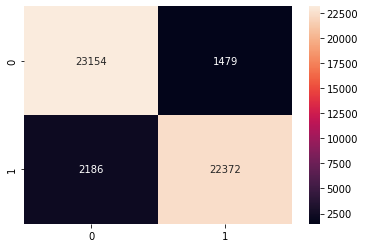

In [325]:
Ran_forest_rus = RandomForestClassifier()

Ran_forest_rus.fit(X_train_rus, y_train_rus)
y_ranpred_rus = Ran_forest_rus.predict(X_val_rus)

print(classification_report(y_val_rus,y_ranpred_rus))
cm_ran_rus = confusion_matrix(y_val_rus, y_ranpred_rus)
f_ran_rus = sns.heatmap(cm_ran_rus, annot=True, fmt='d')

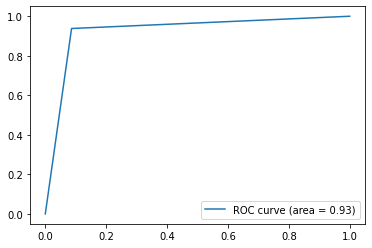

In [326]:
fpr, tpr, _ = metrics.roc_curve(y_val_rus,  y_ranpred_rus)
auc = metrics.roc_auc_score(y_val_rus, y_ranpred_rus)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

RF tuning - rus

In [223]:
#Random forest
parameters_rf = {'n_estimators':range(10,71,10), 'max_depth':range(3,14,2), 'min_samples_split':range(50,201,20)}

# initiate GridSearchCV model
clf_rf = GridSearchCV(estimator= Ran_forest_rus, param_grid= parameters_rf,
                      scoring= 'accuracy', n_jobs= -1, cv= 5)
clf_rf.fit(X_train_rus, y_train_rus)

#result
print('Detail\n', pd.DataFrame.from_records(clf_rf.cv_results_))
print('Best estimator\n', clf_rf.best_estimator_)
print('Best score\n', clf_rf.best_score_)
print('Best parameters\n', clf_rf.best_params_)

Detail
      mean_fit_time  mean_score_time  mean_test_score param_max_depth  \
0         1.249366         0.046224         0.758892               3   
1         1.585286         0.069692         0.771252               3   
2         1.737697         0.061440         0.795274               3   
3         2.102665         0.089738         0.803880               3   
4         2.647236         0.099572         0.812202               3   
..             ...              ...              ...             ...   
331       3.575022         0.120557         0.884938              13   
332       5.221457         0.124653         0.884139              13   
333       6.245138         0.145513         0.885067              13   
334       7.285700         0.179810         0.885026              13   
335       6.803024         0.149364         0.886111              13   

    param_min_samples_split param_n_estimators  \
0                        50                 10   
1                        50

svm - random undersampling - 50mins

              precision    recall  f1-score   support

           0      0.844     0.898     0.870     24633
           1      0.891     0.833     0.861     24558

    accuracy                          0.866     49191
   macro avg      0.867     0.866     0.866     49191
weighted avg      0.867     0.866     0.866     49191



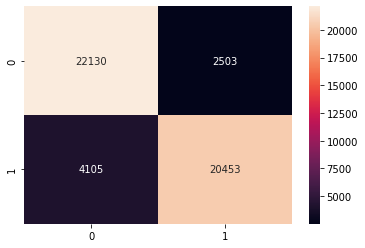

In [327]:
svm_rbf_rus = svm.SVC(kernel='rbf')

svm_rbf_rus.fit(X_train_rus, y_train_rus)
y_rsvmpred_rus = svm_rbf_rus.predict(X_val_rus)

print(classification_report(y_val_rus, y_rsvmpred_rus, digits=3))
cm_svm_rus = confusion_matrix(y_val_rus, y_rsvmpred_rus)
f_svm_rus = sns.heatmap(cm_svm_rus, annot=True, fmt='d')

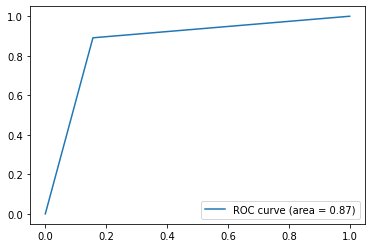

In [328]:
fpr, tpr, _ = metrics.roc_curve(y_val_rus,  y_rsvmpred_rus)
auc = metrics.roc_auc_score(y_val_rus, y_rsvmpred_rus)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

SVM tuning - rus

In [329]:
parameters_svm_rus = {'C':[0.1, 1, 10], 'gamma':[1, 0.1, 0.01,'scale']}

clf_svm_rus = GridSearchCV(estimator= svm_rbf_rus, param_grid= parameters_svm_rus,
                      scoring= 'accuracy', n_jobs= -1, cv= 5)
clf_svm_rus.fit(X_train_rus, y_train_rus)

print('Detail\n', pd.DataFrame.from_records(clf_svm_rus.cv_results_))
print('Best estimator\n', clf_svm_rus.best_estimator_)
print('Best score\n', clf_svm_rus.best_score_)
print('Best parameters\n', clf_svm_rus.best_params_)

Detail
    mean_fit_time  mean_score_time  mean_test_score param_C param_gamma  \
0    2892.949296       493.415704         0.609881     0.1           1   
1    3250.334310       431.083822         0.699613     0.1         0.1   
2    2468.107238       280.093773         0.830626     0.1        0.01   
3    8125.220947       430.820357         0.757523       1           1   
4    7838.206186       353.246870         0.787746       1         0.1   
5    2601.305582       224.780376         0.858240       1        0.01   
6    9994.926211       401.470765         0.766034      10           1   
7    8634.679897       266.897043         0.812140      10         0.1   
8    4328.600566       163.277113         0.865992      10        0.01   

                      params  rank_test_score  split0_test_score  \
0     {'C': 0.1, 'gamma': 1}                9           0.612129   
1   {'C': 0.1, 'gamma': 0.1}                8           0.699305   
2  {'C': 0.1, 'gamma': 0.01}                3  